<a href="https://colab.research.google.com/github/kennedyf2r/mvp_sprint_1/blob/main/MVP_Sprint_1_Kennedy_Ribeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Previsão de casos de AVC - Definição do Problema

1.   **Contextualização**

Segundo a Organização Mundial da Saúde (OMS), o AVC é a 2ª principal causa de morte no mundo, responsável por aproximadamente 11% do total de mortes.

Este conjunto de dados é usado para prever se um paciente tem probabilidade de sofrer um derrame com base nos parâmetros de entrada, como sexo, idade, várias doenças e tabagismo. Cada linha nos dados fornece informações relevantes sobre o paciente.

2.   **Quanto ao tipo de problema**

Considerando o dataset em questão, verificamos que se trata de um problema de aprendizado **supervisionado**, uma vez que os dados de entrada podem ser rotulados, tendo em vista que, de antemão, já sabemos a saída esperada para cada conjunto de dados.

Sendo assim, o objetivo é possibilitar a construção de um modelo preditivo que, com base nas informações do paciente (tais como idade, histórico de doenças cardíacas, tabagismo, imc, etc), possa verificar a possibilidade desse paciente sofrer a ocorrência de um AVC.

3.   **Premissas ou hipóteses**

Os modelos de previsão de AVC usam uma combinação de fatores de risco para estimar a probabilidade de um indivíduo ter um AVC dentro de um determinado período de tempo. Esses modelos podem ser úteis para orientar as estratégias de prevenção e tratamento, como modificações no estilo de vida, gerenciamento de medicamentos e monitoramento rigoroso dos primeiros sinais de AVC.

Isso se refere ao uso de algoritmos e técnicas de aprendizado de máquina para desenvolver modelos para prever o risco de um indivíduo ter um derrame com base em vários fatores, como idade, pressão arterial, níveis de colesterol, tabagismo e outros históricos médicos. Os algoritmos de aprendizado de máquina podem analisar grandes quantidades de dados e identificar padrões e correlações que podem ser usados ​​para fazer previsões com alto grau de precisão. Esses modelos podem ajudar os profissionais de saúde a identificar indivíduos com alto risco de AVC e a implementar medidas preventivas.

4.   **Restrições e condições para seleção dos dados**

Não foram destacadas restrições para o dataset em questão.

5.   **Definição dos atributos**

1) id: identificador único.

2) gender: gênero do paciente
*   "Male": masculino;
*   "Female": feminino; ou 
*   "Other": outros.

3) age: idade do paciente

4) hypertension: se o paciente tem ou não problemas de hipertensão

*   0 se o paciente não tem hipertensão;
*   1 se o paciente tem hipertensão.

5) heart_disease: se o paciente possui alguma cardiopatia

*   0 se o paciente não possui cardiopatia;
*   1 se o paciente possui cardiopatia.

6) ever_married: se o paciente é casado (sim ou não)

7) work_type: tipo de trabalho do paciente

*   "children": Criança
*   "Govt_jov": Governamental
*   "Never_worked": Nunca trabalhou
*   "Private": Iniciativa privada
*   "Self-employed": Autônomo

8) Residence_type: Tipo de residência

*   "Rural": Rural
*   "Urban": Urbana

9) avg_glucose_level: nível médio de glicose no sangue

10) bmi: Índice de massa corporal (IMC) 

11) smoking_status: tabagismo

*   "formerly smoked": ex-fumante
*   "never smoked": nunca fumou
*   "smokes": fumante
*   "Unknown": desconhecido - significa que as informações não estão disponíveis para este paciente

12) stroke: AVC

*   1 se o paciente teve AVC
*   0 se o paciente não teve AVC


# 1 - Análise dos dados

##1.1 - Configurações iniciais

In [776]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import numpy as np
import missingno as ms 

## Transformações Numéricas
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 

## Transformações Categóricas
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# importação do Seaborn para geração de gráficos
import seaborn as sns

Primeiramente, foi realizada toda a configuração necessária para a execução deste notebook.




##1.2 - Importação do dataset

In [777]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/kennedyf2r/mvp_sprint_1/main/healthcare-dataset-stroke-data.csv"

# Informa o cabeçalho das colunas
colunas = ['id', 'gênero', 'idade', 'hipertensão', 'doença_cardíaca', 'se_casado', 'tipo_trabalho', 'tipo_residência', 'glicose', 'imc', 'condição_fumante', 'avc']

# Lê o arquivo utilizando as colunas informadas
df_original = pd.read_csv(url, names=colunas, skiprows=1, delimiter=',')

Em seguida, foram realizadas:
1. a importação do dataset;
2. a definição dos cabeçalhos das colunas;
3. a carga do dataset na variável df_original.

##1.3 - Análise inicial do dataset

In [778]:
#dimensões do dataset
print("O dataset AVC possui {} instâncias e {} atributos".format(*df_original.shape))

O dataset AVC possui 5110 instâncias e 12 atributos


Foi verificado que o dataset em questão possui 5110 instâncias e 12 atributos

In [779]:
#tipos de dados dos atributos
df_original.dtypes

id                    int64
gênero               object
idade               float64
hipertensão           int64
doença_cardíaca       int64
se_casado            object
tipo_trabalho        object
tipo_residência      object
glicose             float64
imc                 float64
condição_fumante     object
avc                   int64
dtype: object

Analisando os tipos de dados dos atributos, foi verificado que os dados estão organizados em 03 (três) tipos (int64, object e float64), conforme a seguinte distribuição:

* Tipo int64: *id, hipertensão, doenca_cardíaca e avc*;
* Tipo object: *gênero, se_casado, tipo_trabalho, tipo_residência e condição_fumante*; e
* Tipo float64: *idade, glicose e imc*.

##1.4 - Analisando as primeiras linhas do dataset

In [780]:
#verificando as primeiras linhas do dataset
df_original.head(10)

,id,gênero,idade,hipertensão,doença_cardíaca,se_casado,tipo_trabalho,tipo_residência,glicose,imc,condição_fumante,avc
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


A verificação das 10 (dez) primeiras linhas do dataset permitem verificar que:

1. A coluna 'id' não representa nenhuma informação relevante para o estudo em questão.

2. Os valores textuais estão no idioma inglês. Para facilitar a compreensão, os dados poderiam ser traduzidos para o português;

3. Apesar das colunas '*hipertensão*', '*doença_cardíaca*' e '*avc*' serem de tipo numérico (int64), na prática, se tratam de atributos categórios, pois tais colunas só assumem 02 (dois) possíveis valores: 0 (que representa 'Não') e 1 (que representa 'Sim'). Uma ação adequada seria transformar transformar essas colunas em um tipo textual, a fim de categorizar os dados;

4. As variáveis '*idade*', '*glicose*' e '*imc*' também podem ser categorizadas, pois os dados nelas contidos não envolvem expressões matemáticas. Além disso, torna-se muito mais fácil de compreender as informações categorizando as idades (recem-nascidos, crianças, adolescentes, jovens, adultos, idosos, etc), os níveis de glicose (hipoglicemia, normal, pré-diabetes, diabetes, etc) e os níveis de imc (peso baixo, normal, excesso de peso, obesidade, etc), por exemplo.

5. Existem valores faltantes na coluna '*imc*'e valores desconhecidos na coluna '*condição_fumante*'. As devidas acões para esses casos serão realizados na etapa de tratamento de *missings*.

##1.5 - Tratamentos iniciais no dataset

###1.5.1 - Criando uma cópia do dataset original para realizar os primeiros tratamentos

In [781]:
# recuperando os nomes das colunas
col = list(df_original.columns)

# o novo dataset irá conter todas as colunas do dataset original
dataset_avc = df_original[col[:]]

dataset_avc.head(10)

,id,gênero,idade,hipertensão,doença_cardíaca,se_casado,tipo_trabalho,tipo_residência,glicose,imc,condição_fumante,avc
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


Foi criada uma cópia do dataset origital a fim de viabilizar as primeiros tratamentos no conjunto de dados sem correr o risco de perder as informações iniciais.

###1.5.2 - Tradução dos valores textuais para o português

In [782]:
#traduzindo os valores da coluna "genero"
dataset_avc['gênero'] = dataset_avc['gênero'].map(
    {
        'Male':'Masculino',
        'Female':'Feminino',
        'Other':'Outros'
    },
    na_action=None)

#traduzindo os valores da coluna "se_casado"
dataset_avc['se_casado'] = dataset_avc['se_casado'].map(
    {
        'Yes':'Sim',
        'No':'Não'
    },
    na_action=None)

#traduzindo os valores da coluna "tipo_trabalho"
dataset_avc['tipo_trabalho'] = dataset_avc['tipo_trabalho'].map(
    {
        'children':'Criança',
        'Govt_jov':'Gorvernamental',
        'Never_worked':'Nunca trabalhou',
        'Private':'Iniciativa privada',
        'Self-employed':'Autônomo',
    },
    na_action=None)

#traduzindo os valores da coluna "tipo_residência"
dataset_avc['tipo_residência'] = dataset_avc['tipo_residência'].map(
    {
        'Urban':'Urbano',
        'Rural':'Rural',
    },
    na_action=None)

#traduzindo os valores da coluna "condição_fumante"
dataset_avc['condição_fumante'] = dataset_avc['condição_fumante'].map(
    {
        'formerly smoked':'ex-fumante',
        'never smoked':'nunca fumou',
        'smokes':'fumante',
        'Unknown':'desconhecido',
    },
    na_action=None)

Em seguida, foram executados códigos com objetivo de traduzir os valores contidos nas colunas '*gênero*', '*se_casado*', '*tipo_trabalho*', '*tipo_residência*'e '*condição_fumante*'.

In [783]:
#Visualização do dataset com valores traduzidos
dataset_avc.head(10)

,id,gênero,idade,hipertensão,doença_cardíaca,se_casado,tipo_trabalho,tipo_residência,glicose,imc,condição_fumante,avc
0,9046,Masculino,67.0,0,1,Sim,Iniciativa privada,Urbano,228.69,36.6,ex-fumante,1
1,51676,Feminino,61.0,0,0,Sim,Autônomo,Rural,202.21,NaN,nunca fumou,1
2,31112,Masculino,80.0,0,1,Sim,Iniciativa privada,Rural,105.92,32.5,nunca fumou,1
3,60182,Feminino,49.0,0,0,Sim,Iniciativa privada,Urbano,171.23,34.4,fumante,1
4,1665,Feminino,79.0,1,0,Sim,Autônomo,Rural,174.12,24.0,nunca fumou,1
5,56669,Masculino,81.0,0,0,Sim,Iniciativa privada,Urbano,186.21,29.0,ex-fumante,1
6,53882,Masculino,74.0,1,1,Sim,Iniciativa privada,Rural,70.09,27.4,nunca fumou,1
7,10434,Feminino,69.0,0,0,Não,Iniciativa privada,Urbano,94.39,22.8,nunca fumou,1
8,27419,Feminino,59.0,0,0,Sim,Iniciativa privada,Rural,76.15,NaN,desconhecido,1
9,60491,Feminino,78.0,0,0,Sim,Iniciativa privada,Urbano,58.57,24.2,desconhecido,1


Após o procedimento, analisando novamente as primeiras linhas do dataset, verifica-se a leitura dos valores traduzidos.

###1.5.3 - Remoção da coluna 'id'

In [784]:
#Remoção da coluna 'id'do dataset_avc
dataset_avc = dataset_avc.drop(columns=['id'])
dataset_avc.head(10)

,gênero,idade,hipertensão,doença_cardíaca,se_casado,tipo_trabalho,tipo_residência,glicose,imc,condição_fumante,avc
0,Masculino,67.0,0,1,Sim,Iniciativa privada,Urbano,228.69,36.6,ex-fumante,1
1,Feminino,61.0,0,0,Sim,Autônomo,Rural,202.21,NaN,nunca fumou,1
2,Masculino,80.0,0,1,Sim,Iniciativa privada,Rural,105.92,32.5,nunca fumou,1
3,Feminino,49.0,0,0,Sim,Iniciativa privada,Urbano,171.23,34.4,fumante,1
4,Feminino,79.0,1,0,Sim,Autônomo,Rural,174.12,24.0,nunca fumou,1
5,Masculino,81.0,0,0,Sim,Iniciativa privada,Urbano,186.21,29.0,ex-fumante,1
6,Masculino,74.0,1,1,Sim,Iniciativa privada,Rural,70.09,27.4,nunca fumou,1
7,Feminino,69.0,0,0,Não,Iniciativa privada,Urbano,94.39,22.8,nunca fumou,1
8,Feminino,59.0,0,0,Sim,Iniciativa privada,Rural,76.15,NaN,desconhecido,1
9,Feminino,78.0,0,0,Sim,Iniciativa privada,Urbano,58.57,24.2,desconhecido,1


Coluna 'id' foi devidamente removida.

###1.5.4 - Alterar os tipos das colunas '*hipertensão*', '*doença_cardíaca*' e '*avc*'

In [785]:
#Altera os dados da coluna hipertensão para um tipo textual
dataset_avc.loc[dataset_avc['hipertensão'] == 0, 'hipertensão'] = "Não"
dataset_avc.loc[dataset_avc['hipertensão'] == 1, 'hipertensão'] = "Sim"

#Altera os dados da coluna 'doença_cardíaca' para um tipo textual
dataset_avc.loc[dataset_avc['doença_cardíaca'] == 0, 'doença_cardíaca'] = "Não"
dataset_avc.loc[dataset_avc['doença_cardíaca'] == 1, 'doença_cardíaca'] = "Sim"

#Altera os dados da coluna 'avc' para um tipo textual
dataset_avc.loc[dataset_avc['avc'] == 0, 'avc'] = "Não"
dataset_avc.loc[dataset_avc['avc'] == 1, 'avc'] = "Sim"

dataset_avc.head(10)

,gênero,idade,hipertensão,doença_cardíaca,se_casado,tipo_trabalho,tipo_residência,glicose,imc,condição_fumante,avc
0,Masculino,67.0,Não,Sim,Sim,Iniciativa privada,Urbano,228.69,36.6,ex-fumante,Sim
1,Feminino,61.0,Não,Não,Sim,Autônomo,Rural,202.21,NaN,nunca fumou,Sim
2,Masculino,80.0,Não,Sim,Sim,Iniciativa privada,Rural,105.92,32.5,nunca fumou,Sim
3,Feminino,49.0,Não,Não,Sim,Iniciativa privada,Urbano,171.23,34.4,fumante,Sim
4,Feminino,79.0,Sim,Não,Sim,Autônomo,Rural,174.12,24.0,nunca fumou,Sim
5,Masculino,81.0,Não,Não,Sim,Iniciativa privada,Urbano,186.21,29.0,ex-fumante,Sim
6,Masculino,74.0,Sim,Sim,Sim,Iniciativa privada,Rural,70.09,27.4,nunca fumou,Sim
7,Feminino,69.0,Não,Não,Não,Iniciativa privada,Urbano,94.39,22.8,nunca fumou,Sim
8,Feminino,59.0,Não,Não,Sim,Iniciativa privada,Rural,76.15,NaN,desconhecido,Sim
9,Feminino,78.0,Não,Não,Sim,Iniciativa privada,Urbano,58.57,24.2,desconhecido,Sim


Após as alterações, verifica-se que os valores das colunas '*hipertensão*', '*doença_cardíaca*' e '*avc*' foram modificados para tipos categóricos, possibilitando uma interpretação mais intuitiva dos dados.

##1.6 - Análise individual dos atributos do dataset

###1.6.1 - Atributo "genero"

In [786]:
#Resumo estatístico do atributo "genero"
dataset_avc["gênero"].describe()

count         5110
unique           3
top       Feminino
freq          2994
Name: gênero, dtype: object

Foi observado que o atributo "genero", que a priori deveria conter apenas 02 (duas) categorias (Masculino ou Feminino), possui uma categoria a mais, definindo um total de 03 (três) valores únicos.

In [787]:
#verificando a distribuição do atributo "genero"
dataset_avc["gênero"].value_counts()

Feminino     2994
Masculino    2115
Outros          1
Name: gênero, dtype: int64

Verificou-se que além das categorias "Masculino"e "Feminino", existe uma categoria "Outros", para a qual consta apenas 1 registro.

<Axes: xlabel='gênero', ylabel='count'>

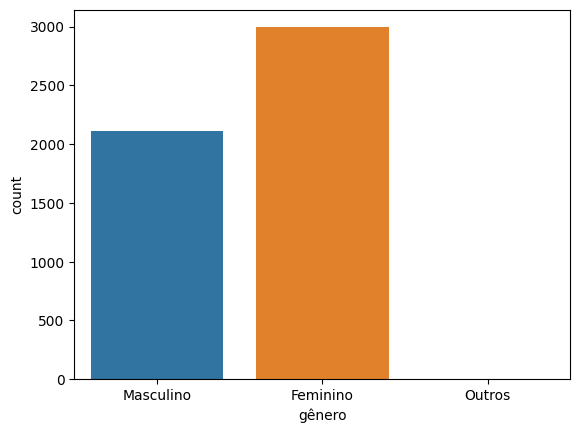

In [788]:
#análise gráfica 'gênero'
sns.countplot(x='gênero', data=dataset_avc)

Considerando apenas os valores registrados como "Masculino"e "Feminino", verifica-se que se trata de uma classe balanceada.

**Conclusão: desconsidarando qualquer viés ideológico, para fins de elaboração de modelos preditivos, sugere-se excluir do dataset o registro referente gênero "Outros", na etapa de pré-processamento de dados.**

###1.6.2 - Atributo "idade"

In [789]:
#Resumo estatístico do atributo "idade"
dataset_avc["idade"].describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: idade, dtype: float64

Realizando a análise inicial do atributo, chama a atenção o valor mínimo da coluna idade, registrado como 0.08.

Essa observação levanta a suspeita de que possam existir outros valores de idade em formato decimal, o que não seria um formato muito comum.

In [790]:
#verificação dos registros com idades em formato decimal

#definição de um array auxiliar que irá guardar os registros que possuem idades em formato decial
df_aux = []

#a rotina percorre todos os registros do dataset e armazena no array apenas os registros com valores decimais
for i in dataset_avc.index:
  valor = dataset_avc.iloc[i,1]
  if valor != int(valor):
    df_aux.append(dataset_avc.loc[i])

#converte o array em formato dataframe
df = pd.DataFrame(df_aux)

#exibe todas a linhas do dataframe que possuem idades e formato decimal
df.head(200)


,gênero,idade,hipertensão,doença_cardíaca,se_casado,tipo_trabalho,tipo_residência,glicose,imc,condição_fumante,avc
162,Feminino,1.32,Não,Não,Não,Criança,Urbano,70.37,NaN,desconhecido,Sim
363,Feminino,0.64,Não,Não,Não,Criança,Urbano,83.82,24.9,desconhecido,Não
376,Feminino,0.88,Não,Não,Não,Criança,Rural,88.11,15.5,desconhecido,Não
562,Feminino,1.80,Não,Não,Não,Criança,Urbano,58.26,16.5,desconhecido,Não
564,Feminino,0.32,Não,Não,Não,Criança,Rural,73.71,16.2,desconhecido,Não
...,...,...,...,...,...,...,...,...,...,...,...
4934,Masculino,1.32,Não,Não,Não,Criança,Rural,107.02,NaN,desconhecido,Não
5032,Feminino,1.24,Não,Não,Não,Criança,Rural,61.94,20.3,desconhecido,Não
5079,Masculino,1.72,Não,Não,Não,Criança,Urbano,77.28,17.1,desconhecido,Não
5089,Feminino,0.72,Não,Não,Não,Criança,Rural,62.13,16.8,desconhecido,Não


Verificando apenas os registros que possuem idades em formato decimal, concluímos que existem 115 registros, e que todos eles referem-se a crianças com idade menor que 2 anos.



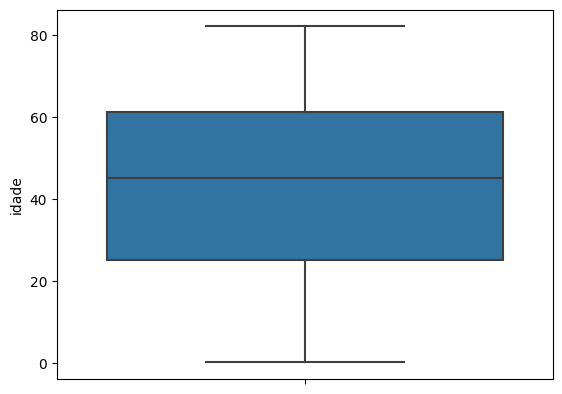

In [791]:
#boxplot com seaborn
sns.boxplot(y=dataset_avc['idade']);

Além disso, a análise gráfica do atributo permite verificar que não existem outliers.

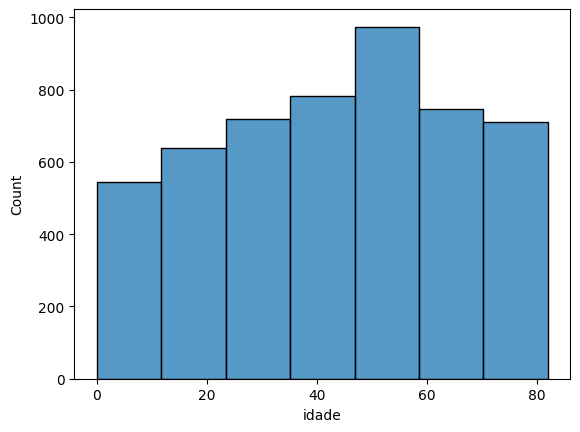

In [792]:
# histograma com seaborn
sns.histplot(dataset_avc['idade'], bins=7);

O histograma permite verificar que o dataset possui pacientes muito jovens ou muito idosos.

**Conclusão: Verifica-se que não há erros de entrada de dados referente à coluna idade e, por essa razão, para fins de permitir uma melhor interpretação dos dados, sugere-se categorizar esses dados na etapa de pré-processamento.**

###1.6.3 - Atributo "hipertensao"

In [793]:
#Resumo estatístico do atributo "hipertensao"
dataset_avc["hipertensão"].describe()

count     5110
unique       2
top        Não
freq      4612
Name: hipertensão, dtype: object

O atributo "hipertensão" possui apenas duas categorias de valores: Sim e Não.

In [794]:
#verificando a distribuição do atributo "hipertensao"
dataset_avc["hipertensão"].value_counts()

Não    4612
Sim     498
Name: hipertensão, dtype: int64

Analisando a distribuição dos valores desse atributo, percebe-se que se trata de uma classe não balanceada.

<Axes: xlabel='hipertensão', ylabel='count'>

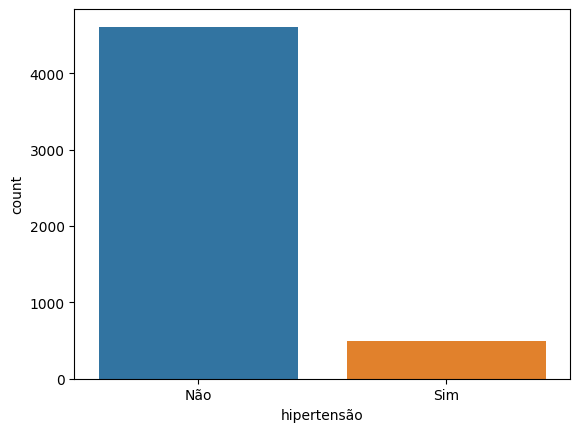

In [795]:
#análise gráfica 'hipertensao'
sns.countplot(x='hipertensão', data=dataset_avc)

A visualização gráfica permite verificar o não balanceamento da classe de forma mais clara.

**Conclusão**: **Sugere-se realizar o balanceamente da classe, por meio da técnica de validação cruzada estratificada.**

###1.6.4 - Atributo "doença_cardíaca"

In [796]:
#Resumo estatístico do atributo "doenca_cardiaca"
dataset_avc["doença_cardíaca"].describe()

count     5110
unique       2
top        Não
freq      4834
Name: doença_cardíaca, dtype: object

O atributo "hipertensão" possui apenas duas categorias de valores: Sim e Não.

In [797]:
#verificando a distribuição do atributo "doenca_cardiaca"
dataset_avc["doença_cardíaca"].value_counts()

Não    4834
Sim     276
Name: doença_cardíaca, dtype: int64

Analisando a distribuição dos valores desse atributo, percebe-se que se trata de uma classe desbalanceada.

<Axes: xlabel='doença_cardíaca', ylabel='count'>

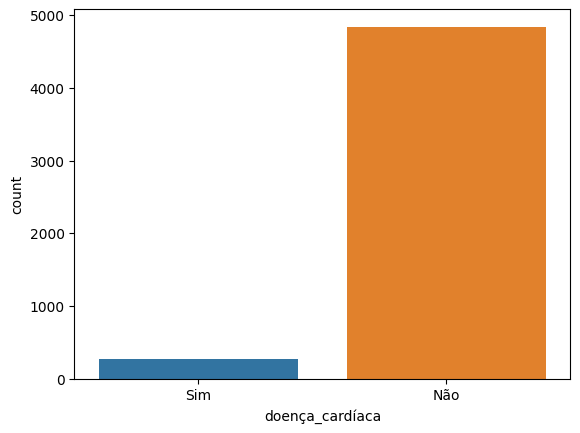

In [798]:
#análise gráfica 'doenca_cardiaca'
sns.countplot(x='doença_cardíaca', data=dataset_avc)

A visualização gráfica permite verificar o desbalanceamento da classe de forma mais clara.

**Conclusão**: **Sugere-se realizar o balanceamente da classe, por meio da técnica de validação cruzada estratificada.**

###1.6.5 - Atributo "se_casado""


In [799]:
#Resumo estatístico do atributo "se_casado"
dataset_avc["se_casado"].describe()

count     5110
unique       2
top        Sim
freq      3353
Name: se_casado, dtype: object

Inicialmente, não se verifica nenhuma anomalia no atributo "se_casado".

In [800]:
#verificando a distribuição do atributo "se_casado"
dataset_avc["se_casado"].value_counts()

Sim    3353
Não    1757
Name: se_casado, dtype: int64

Também foi verificada a distribuição dos valores dessa classe.

<Axes: xlabel='se_casado', ylabel='count'>

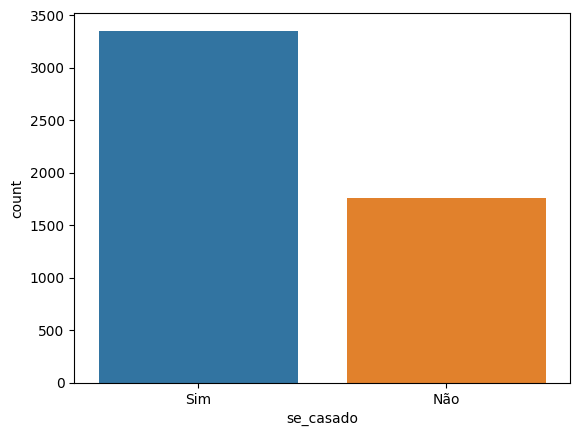

In [801]:
#análise gráfica 'se_casado'
sns.countplot(x='se_casado', data=dataset_avc)

A análise gráfica permite visualizar com mais facilidade que se trata de uma classe balanceada.

**Conclusão: não se verifica a necessidade de nenhum tratamento específico para esse atributo.**

###1.6.6 - Atributo "tipo_trabalho"

In [802]:
#Resumo estatístico do atributo "tipo_trabalho"
dataset_avc["tipo_trabalho"].describe()

count                   4453
unique                     4
top       Iniciativa privada
freq                    2925
Name: tipo_trabalho, dtype: object

A primeira análise permite verificar que o atributo possui 4 valores distintos, e que o valor de maior frequência é responsável por mais de 50% dos registros.

In [803]:
#verificando a distribuição do atributo "tipo_trabalho"
dataset_avc["tipo_trabalho"].value_counts()

Iniciativa privada    2925
Autônomo               819
Criança                687
Nunca trabalhou         22
Name: tipo_trabalho, dtype: int64

Também foi verificada a distribuição dos valores do atributo.

<Axes: xlabel='tipo_trabalho', ylabel='count'>

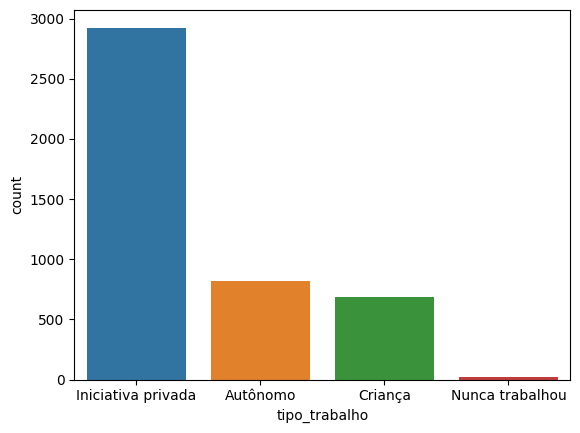

In [804]:
#análise gráfica 'tipo_trabalho'
sns.countplot(x='tipo_trabalho', data=dataset_avc)

A visualização gráfica permite verificar o desbalanceamento da classe de forma mais clara. O atributo "Iniciativa privada" contém a grande maioria dos registros, ao passo que o valor "Nunca trabalhou" corresponde a uma quantidade pouco significativa.

**Conclusão**: **Realizar o balanceamente da classe, por meio da técnica de validação cruzada estratificada, por exemplo**.


###1.6.7 - Atributo "tipo_residência"

In [805]:
#Resumo estatístico do atributo "tipo_residência"
dataset_avc["tipo_residência"].describe()

count       5110
unique         2
top       Urbano
freq        2596
Name: tipo_residência, dtype: object

Inicialmente, não se verifica nenhuma anomalia no atributo "tipo_residência".

In [806]:
#verificando a distribuição do atributo "tipo_residência"
dataset_avc["tipo_residência"].value_counts()

Urbano    2596
Rural     2514
Name: tipo_residência, dtype: int64

Também foi verificada a distribuição dos valores da classe.

<Axes: xlabel='tipo_residência', ylabel='count'>

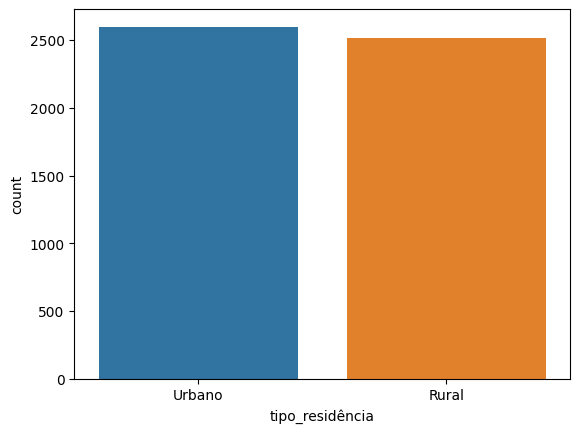

In [807]:
#análise gráfica 'tipo_residência'
sns.countplot(x='tipo_residência', data=dataset_avc)

A análise gráfifca permite verificar que se trata de um classe balanceada.

**Conclusão: não se verifica a necessidade de nenhum tratamento específico para esse atributo.**

###1.6.8 - Atributo "glicose"

In [808]:
#Resumo estatístico do atributo "glicose"
dataset_avc["glicose"].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: glicose, dtype: float64

Inicialmente, não se verifica nenhuma anomalia em relação ao valores do atributo glicose. A média, bem comom os valores mínimo e máximo, apresentam valores coerentes.

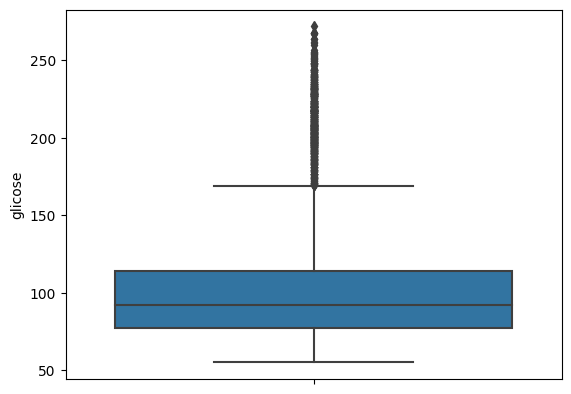

In [809]:
#boxplot com seaborn
sns.boxplot(y=dataset_avc['glicose']);

O gráfico de bloxplot permite verificar que a classe possui outliers.

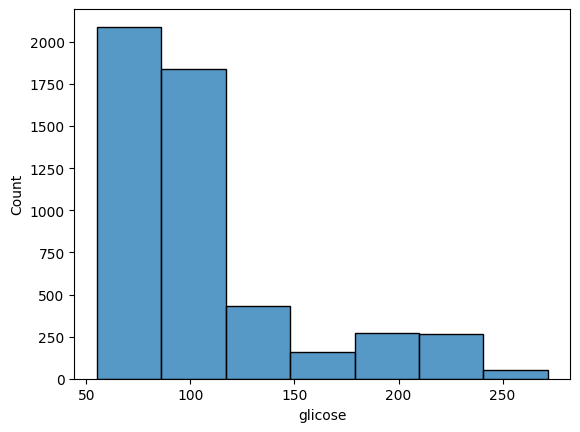

In [810]:
# histograma com seaborn
sns.histplot(dataset_avc['glicose'], bins=7);

A análise da gráfica também permite verificar que a maioria dos dados são inferiores a 150.

**Conclusão**: Para a etapa de pré-processamento, sugere-se aplicar técnicas para tratar os outliers, tais como: excluir os registros, analisá-los separadamente ou utilizar métodos de clusterizacão.

###1.6.9 - Atributo "imc"

In [811]:
#Resumo estatístico do atributo "imc"
dataset_avc["imc"].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: imc, dtype: float64

Inicialmente, não se verifica nenhuma anomalia em relação ao valores do atributo imc. A média, bem comom os valores mínimo e máximo, apresentam valores coerentes.

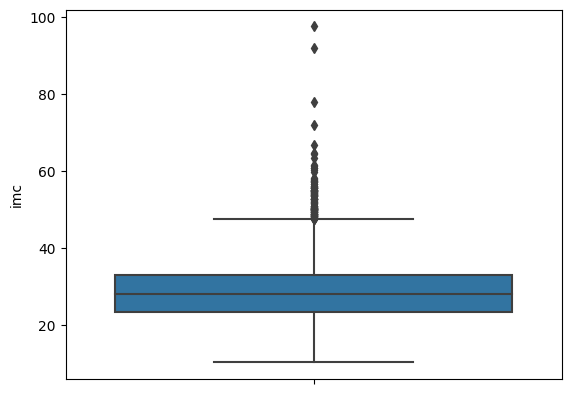

In [812]:
#boxplot com seaborn
sns.boxplot(y=dataset_avc['imc']);

O gráfico de bloxplot permite verificar que a classe possui outliers.

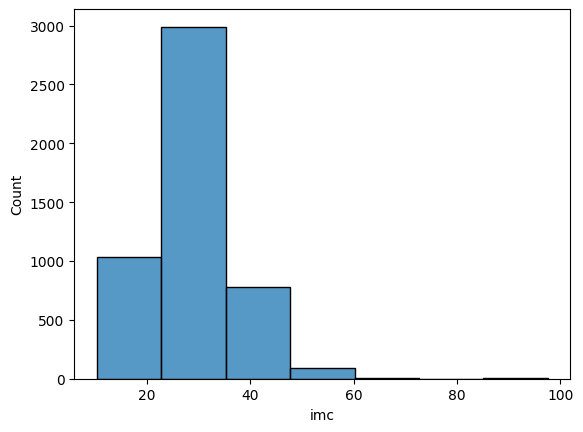

In [813]:
# histograma com seaborn
sns.histplot(dataset_avc['imc'], bins=7);

A análise da gráfica também permite verificar que a maioria dos dados são de valores inferiores a 50.

**Conclusão**: Para a etapa de pré-processamento, sugere-se aplicar técnicas para tratar os outliers, tais como: excluir os registros, analisá-los separadamente ou utilizar métodos de clusterizacão.

###1.6.10 - Atributo "condição_fumante"

In [814]:
#Resumo estatístico do atributo "condicao_fumante"
dataset_avc["condição_fumante"].describe()

count            5110
unique              4
top       nunca fumou
freq             1892
Name: condição_fumante, dtype: object

Inicialmente, percebe-se que a classe possui quatro categorias, as quais serão listadas a seguir.

In [815]:
#verificando a distribuição do atributo "condicao_fumante"
dataset_avc["condição_fumante"].value_counts()

nunca fumou     1892
desconhecido    1544
ex-fumante       885
fumante          789
Name: condição_fumante, dtype: int64

A análise detalhada da distribuição permite verificar que existem muitos registros com valores desconhecidos.

<Axes: xlabel='condição_fumante', ylabel='count'>

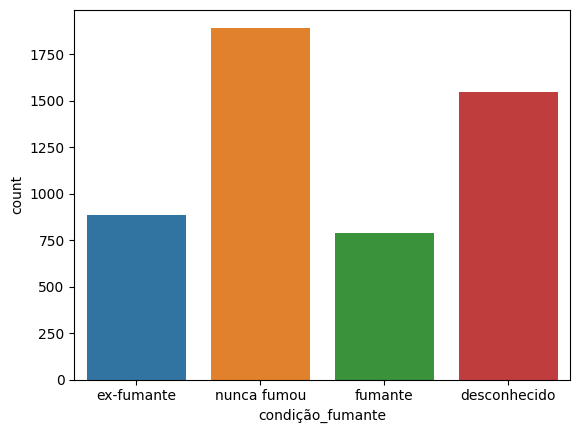

In [816]:
#análise gráfica 'condicao_fumante'
sns.countplot(x='condição_fumante', data=dataset_avc)

A análise gráfica permite uma verificação mais clara acerca dessa distribuição.

**Conclusão**: Para a etapa de pré-processamento, sugere-se aplicar técnicas para tratar valores nulos, tendo em vista que, na prática, os valores dessa classe marcados como desconhecidos podem ser interpretados como valores nulos.



###1.6.11 - Atributo "avc"

In [817]:
#Resumo estatístico do atributo "avc"
dataset_avc["avc"].describe()

count     5110
unique       2
top        Não
freq      4861
Name: avc, dtype: object

O atributo "avc" possui apenas duas categorias de valores: Sim e Não.

In [818]:
#verificando a distribuição do atributo "avc"
dataset_avc["avc"].value_counts()

Não    4861
Sim     249
Name: avc, dtype: int64

Analisando a distribuição dos valores desse atributo, percebe-se que se trata de uma classe não balanceada.

<Axes: xlabel='avc', ylabel='count'>

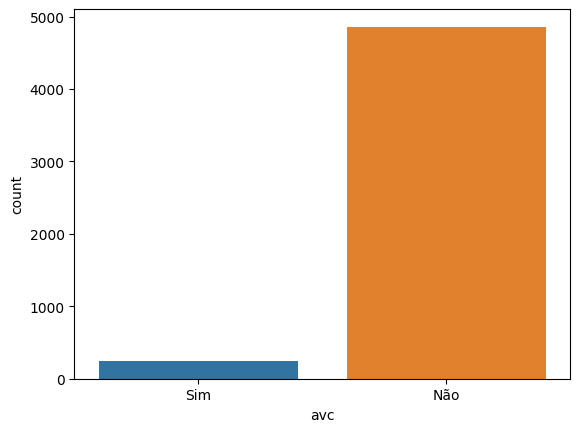

In [819]:
#análise gráfica 'avc'
sns.countplot(x='avc', data=dataset_avc)

A visualização gráfica permite verificar o não balanceamento da classe de forma mais clara.

**Conclusão**: **Sugere-se realizar o balanceamente da classe, por meio da técnica de validação cruzada estratificada.**

##1.7 - Análise combinada dos atributos

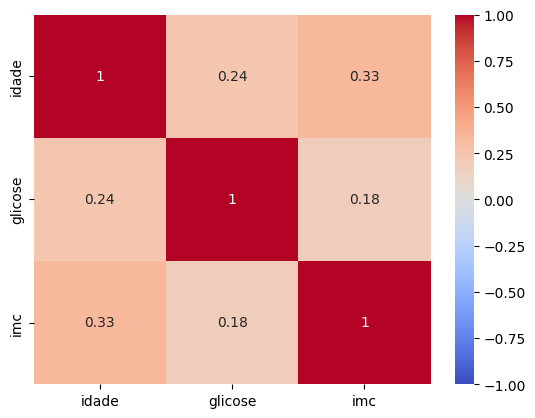

In [820]:
# gráfico de correlação com Seaborn
sns.heatmap(dataset_avc.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1);

Por meio do gráfico, verifica-se que há pouca, ou quase nenhuma, correlação entre as variáveis numéricas do dataset. 

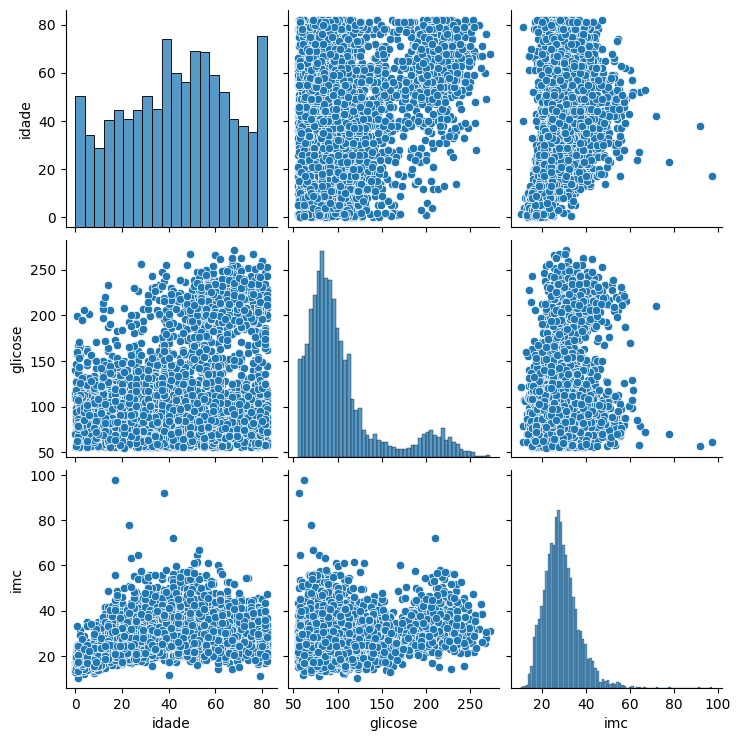

In [821]:
# pair plot 1 com Seaborn
sns.pairplot(dataset_avc);

Por meio desse gráfico, não consegui interpretar nada que chamasse atenção para a análise em questão. Apenas a visualização de alguns outliers, os quais já haviam sido identificados anteriormente.

#2 - Etapa de Pré-processamento dos Dados

##2.1 - Transformações numéricas

###2.1.1 - Analisando as primeiras linhas do dataset

In [822]:
#Verificando as 10 primeiras linhas do dataset
dataset_avc.head(10)

,gênero,idade,hipertensão,doença_cardíaca,se_casado,tipo_trabalho,tipo_residência,glicose,imc,condição_fumante,avc
0,Masculino,67.0,Não,Sim,Sim,Iniciativa privada,Urbano,228.69,36.6,ex-fumante,Sim
1,Feminino,61.0,Não,Não,Sim,Autônomo,Rural,202.21,NaN,nunca fumou,Sim
2,Masculino,80.0,Não,Sim,Sim,Iniciativa privada,Rural,105.92,32.5,nunca fumou,Sim
3,Feminino,49.0,Não,Não,Sim,Iniciativa privada,Urbano,171.23,34.4,fumante,Sim
4,Feminino,79.0,Sim,Não,Sim,Autônomo,Rural,174.12,24.0,nunca fumou,Sim
5,Masculino,81.0,Não,Não,Sim,Iniciativa privada,Urbano,186.21,29.0,ex-fumante,Sim
6,Masculino,74.0,Sim,Sim,Sim,Iniciativa privada,Rural,70.09,27.4,nunca fumou,Sim
7,Feminino,69.0,Não,Não,Não,Iniciativa privada,Urbano,94.39,22.8,nunca fumou,Sim
8,Feminino,59.0,Não,Não,Sim,Iniciativa privada,Rural,76.15,NaN,desconhecido,Sim
9,Feminino,78.0,Não,Não,Sim,Iniciativa privada,Urbano,58.57,24.2,desconhecido,Sim


Inicialmente, verifica-se que, para realizar o tratamento de missings (valores nulos), se faz necessário substituir os valores descritos como "desconhecido" na coluna "condição_fumante".

###2.1.2 - Tratamento de missings

In [823]:
# substituindo "desconhecido" por np.nan na coluna "condição_fumante"
col_condicao_fumante = dataset_avc['condição_fumante'].replace('desconhecido',np.nan)
dataset_avc['condição_fumante'] = col_condicao_fumante
dataset_avc.head(10)


,gênero,idade,hipertensão,doença_cardíaca,se_casado,tipo_trabalho,tipo_residência,glicose,imc,condição_fumante,avc
0,Masculino,67.0,Não,Sim,Sim,Iniciativa privada,Urbano,228.69,36.6,ex-fumante,Sim
1,Feminino,61.0,Não,Não,Sim,Autônomo,Rural,202.21,NaN,nunca fumou,Sim
2,Masculino,80.0,Não,Sim,Sim,Iniciativa privada,Rural,105.92,32.5,nunca fumou,Sim
3,Feminino,49.0,Não,Não,Sim,Iniciativa privada,Urbano,171.23,34.4,fumante,Sim
4,Feminino,79.0,Sim,Não,Sim,Autônomo,Rural,174.12,24.0,nunca fumou,Sim
5,Masculino,81.0,Não,Não,Sim,Iniciativa privada,Urbano,186.21,29.0,ex-fumante,Sim
6,Masculino,74.0,Sim,Sim,Sim,Iniciativa privada,Rural,70.09,27.4,nunca fumou,Sim
7,Feminino,69.0,Não,Não,Não,Iniciativa privada,Urbano,94.39,22.8,nunca fumou,Sim
8,Feminino,59.0,Não,Não,Sim,Iniciativa privada,Rural,76.15,NaN,NaN,Sim
9,Feminino,78.0,Não,Não,Sim,Iniciativa privada,Urbano,58.57,24.2,NaN,Sim


Os valores da coluna 'condição_fumante' que, anteriormente, estavam marcados como 'desconhecido', passaram a ter valor NaN (nulos)

In [824]:
# verificando nulls no dataset
dataset_avc.isnull().sum()

gênero                 0
idade                  0
hipertensão            0
doença_cardíaca        0
se_casado              0
tipo_trabalho        657
tipo_residência        0
glicose                0
imc                  201
condição_fumante    1544
avc                    0
dtype: int64

Verifica-se que há 3 colunas com valores faltantes: 'tipo_trabalho', 'imc' e 'condição_fumante'.

In [825]:
# salvando um novo dataset para tratamento de missings

# recuperando os nomes das colunas
col = list(dataset_avc.columns)

# o novo dataset irá conter todas as colunas do dataset original
datasetSemMissings = dataset_avc[col[:]]

Como boa prática, criamos um novo dataset para realizar o tratamentos dos missings

<Axes: >

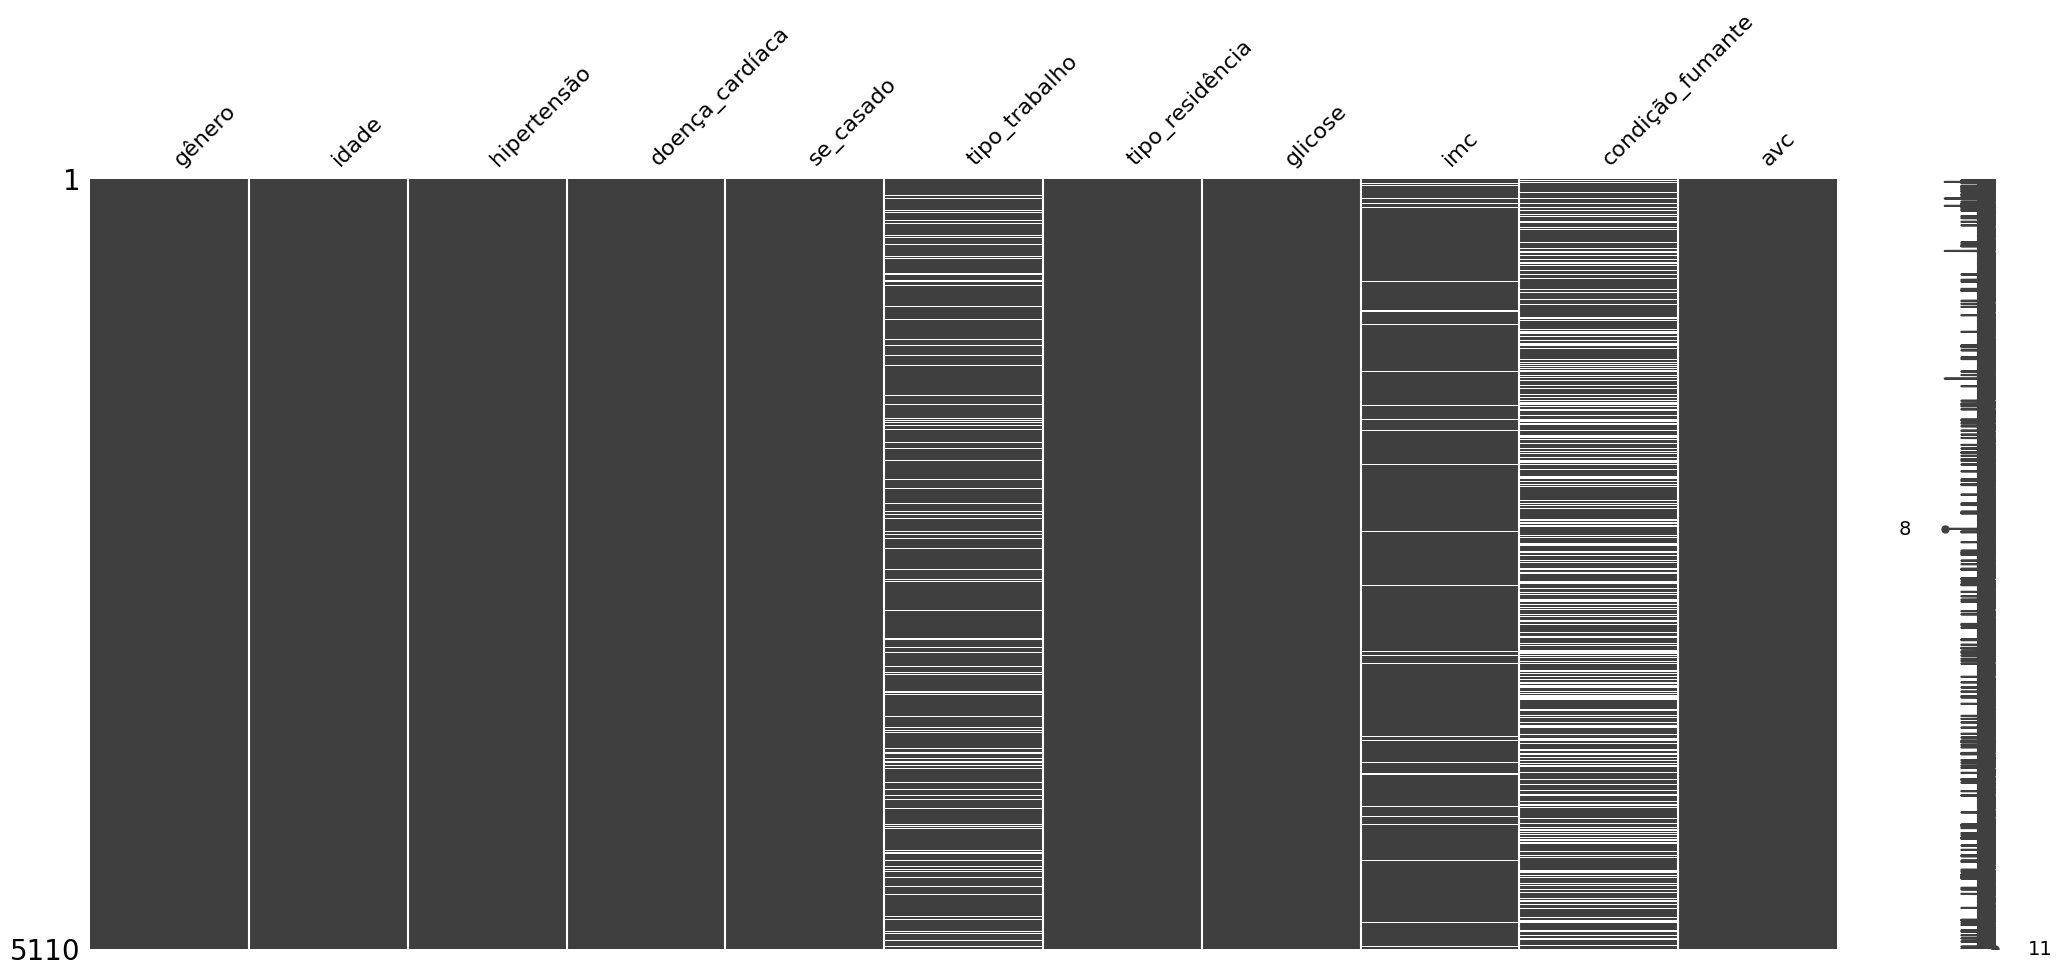

In [826]:
# substituindo os zeros por NaN
#datasetSemMissings.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(datasetSemMissings)

A visualização matricial dos dados permite verificar a frequência dos missings (valores nulos), representados pelas áreas em branco, nas colunas 'tipo_trabalho', 'imc' e 'condicao_fumante'. 

In [827]:
# verificando novamente nulls no dataset
datasetSemMissings.isnull().sum()

gênero                 0
idade                  0
hipertensão            0
doença_cardíaca        0
se_casado              0
tipo_trabalho        657
tipo_residência        0
glicose                0
imc                  201
condição_fumante    1544
avc                    0
dtype: int64

Por meio da consulta acima, percebe-se a quantidade de valores faltantes em cada coluna. Verifica-se que, em relação à quantidade de registros do dataset, há poucos missings na coluna "imc" e muitos missigns na coluna "condição_fumante".

<Axes: >

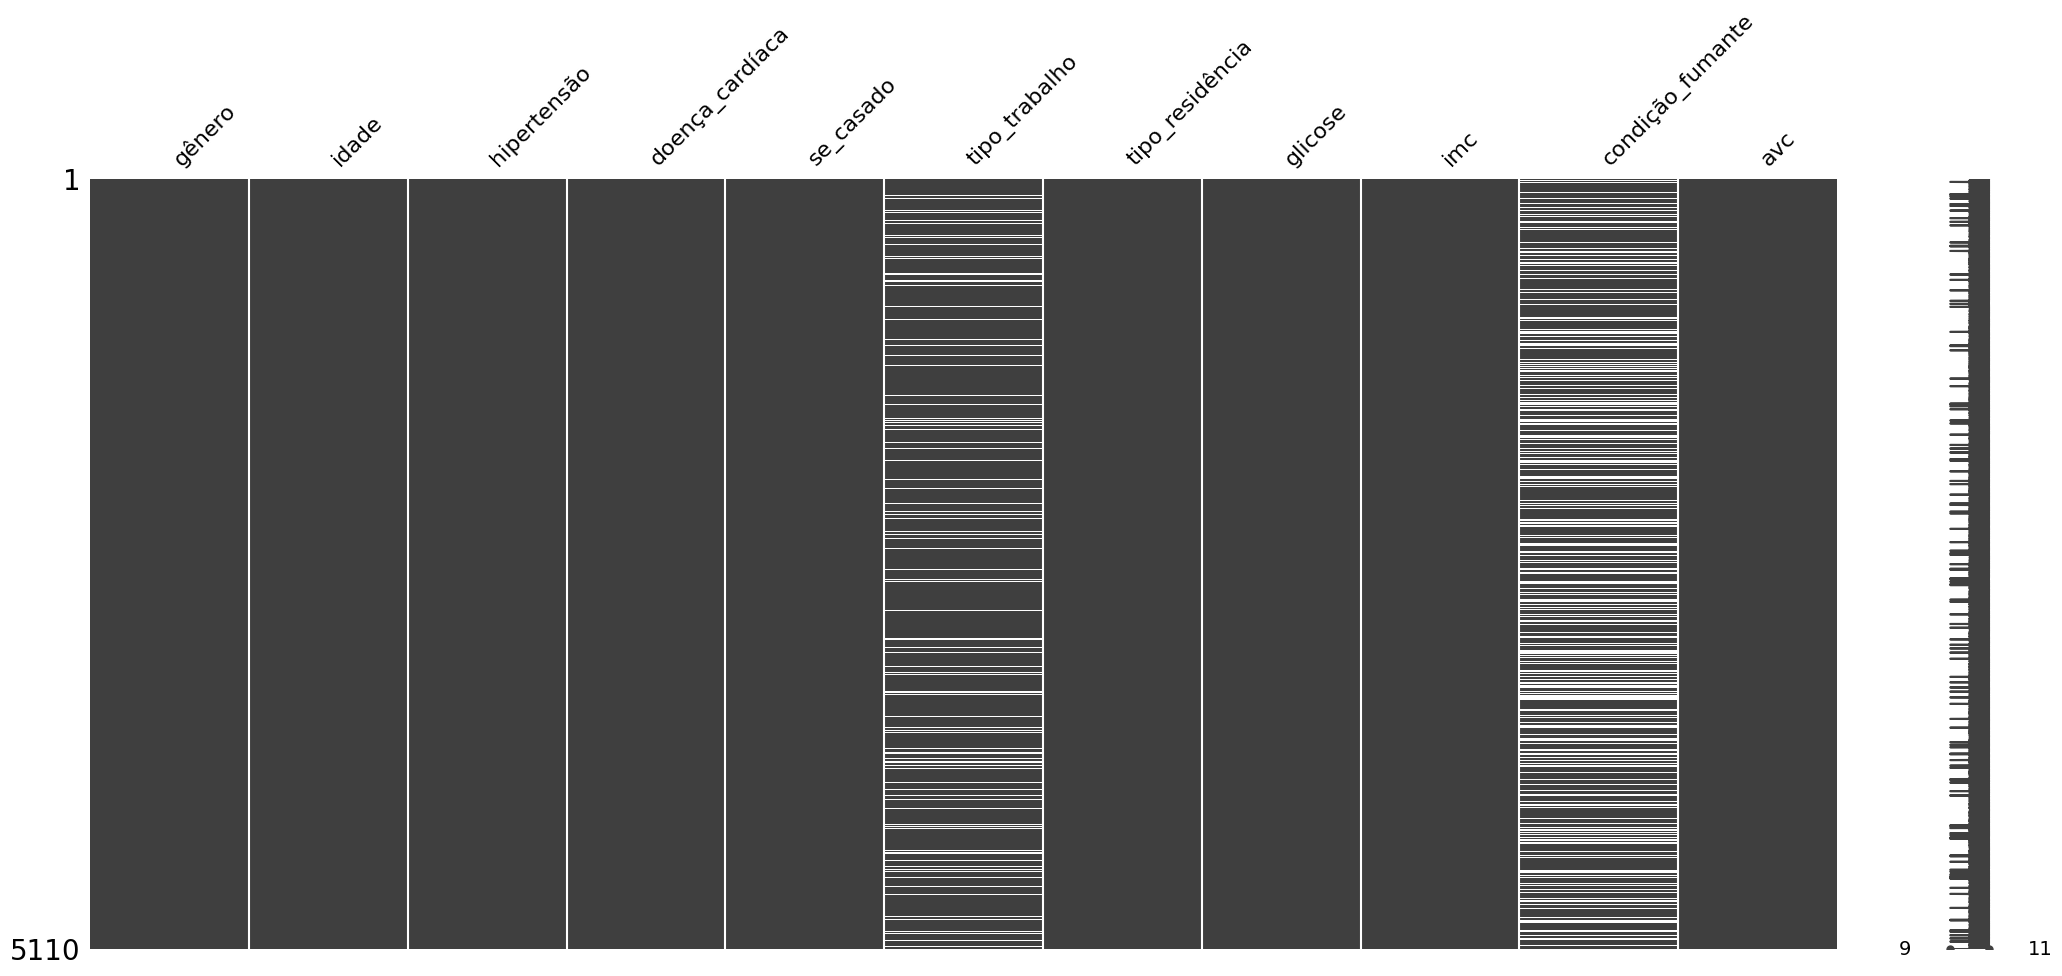

In [828]:
# substituindo os NaN de 'imc' pela mediana da coluna
datasetSemMissings['imc'].fillna(datasetSemMissings['imc'].median(), inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(datasetSemMissings)

Devido à baixa quantidade de missings na coluna "imc", adotamos a estratégica de substituir os valores faltantes em "imc" pela mediana dos valores dessa coluna.

In [829]:
# verificando novamente nulls no dataset
datasetSemMissings.isnull().sum()

gênero                 0
idade                  0
hipertensão            0
doença_cardíaca        0
se_casado              0
tipo_trabalho        657
tipo_residência        0
glicose                0
imc                    0
condição_fumante    1544
avc                    0
dtype: int64

Asssim, ficou a nova distribuição de missings no dataset.

In [830]:
# eliminando linhas que tenham ALGUM valor missing

datasetSemMissings = datasetSemMissings.dropna(how='any')
#dimensões do dataset
print("O dataset Sem Missing apresenta {} instâncias e {} atributos".format(*datasetSemMissings.shape))

O dataset Sem Missing apresenta 3031 instâncias e 11 atributos


Nesse ponto, foi entendido que as duas colunas que apresentavam missings são muito importantes para definir, de forma precisa, um modelo preditivo para casos de AVC.

Devido à quantidade de missings nessas colunas, sobretudo na coluna 'condição_fumante', foi levantada a hipótese de remover tais colunas do dataset como uma estratégia de tratamento de missings.

No entanto, sabe-se que variáveis como "condição_fumante" e "tipo_trabalho" têm alta relação com casos de AVC. Por essa razão, optamos por manter tais colunas no dataset e excluir os registros que tivessem algum valor nulo nas referidas colunas.

Vale destacar que, apesar dessa estratégia eliminar em torno de 40% dos registros do dataset, entende-se que o dataset ainda conterá uma quantidade de dados suficiente para realizar os estudos necessários.

Tal estratégia também não descarta que, no futuro, sejam feitos estudos desconsiderando tais colunas e mantendo a totalidade dos registros iniciais.

In [831]:
# verificando nulls no dataset tratado
datasetSemMissings.isnull().sum()

gênero              0
idade               0
hipertensão         0
doença_cardíaca     0
se_casado           0
tipo_trabalho       0
tipo_residência     0
glicose             0
imc                 0
condição_fumante    0
avc                 0
dtype: int64

Dataset sem missings.

<Axes: >

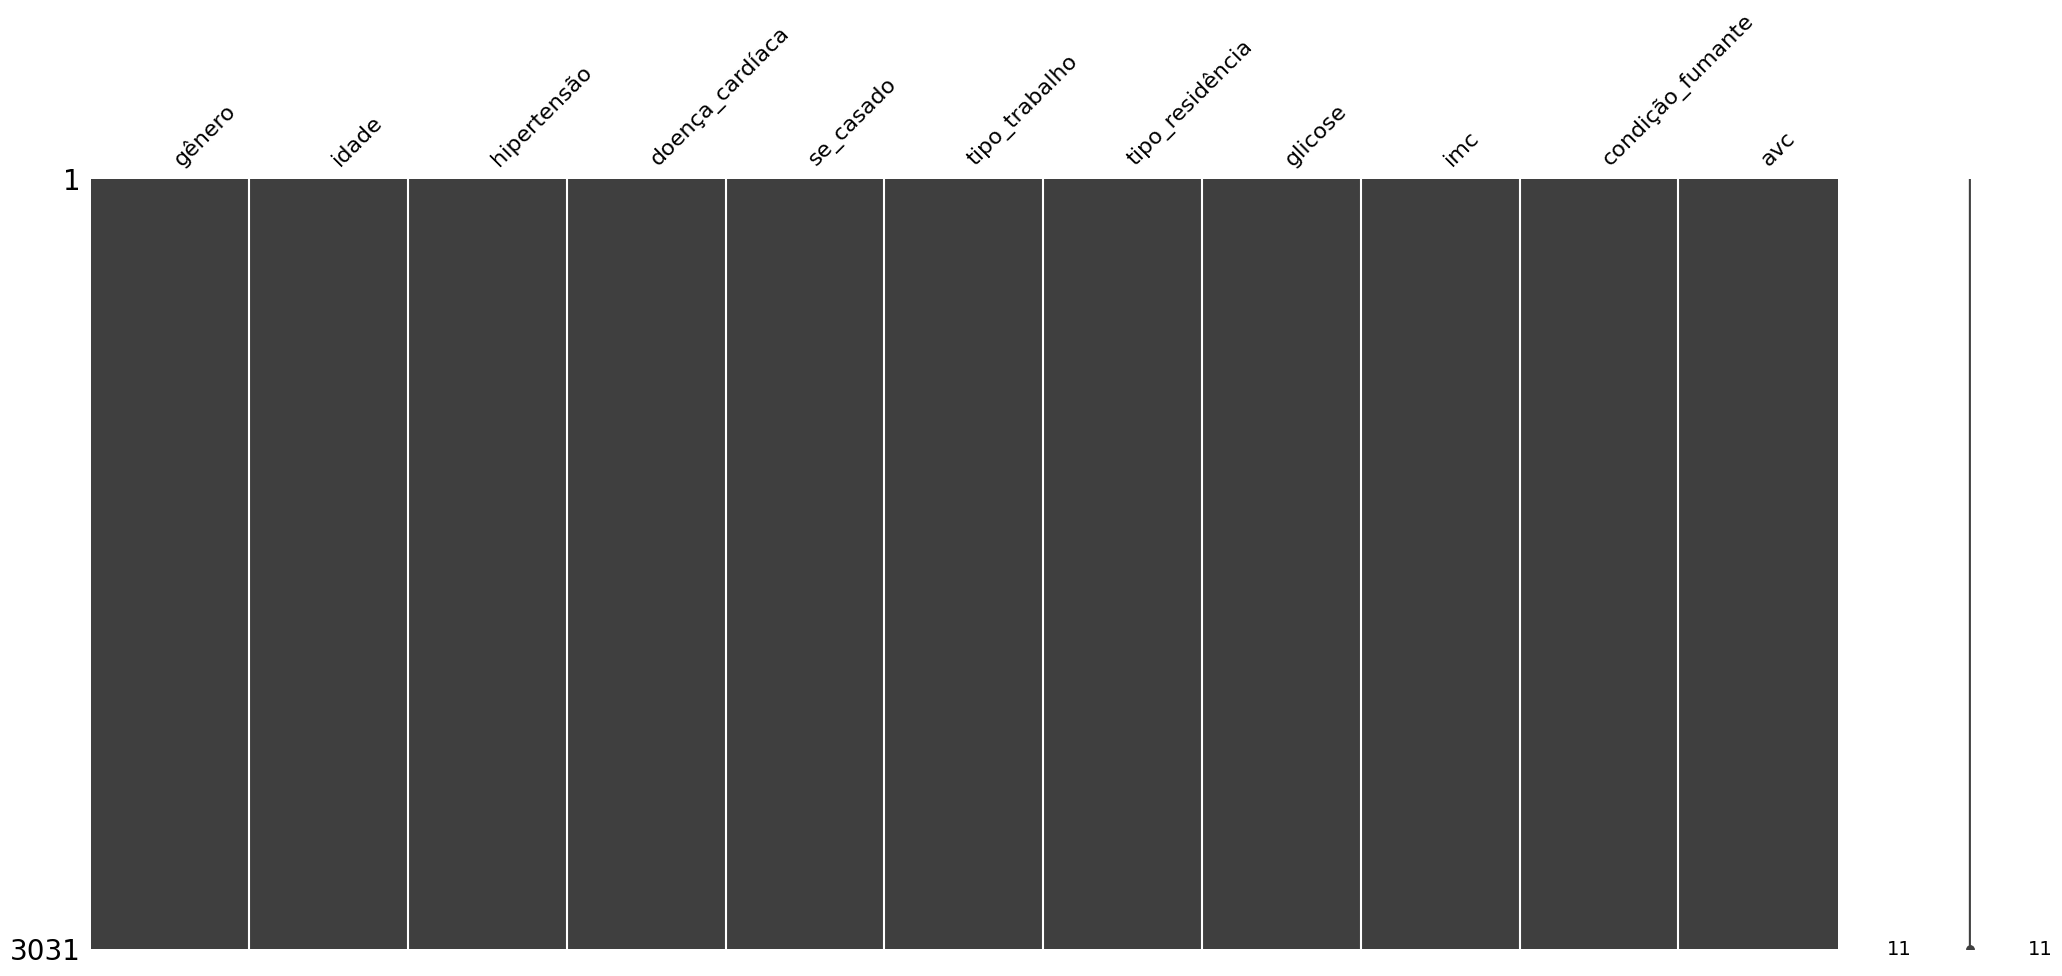

In [832]:
# exibindo visualização matricial da nulidade do dataset
ms.matrix(datasetSemMissings)

Visualização matricial do dataset sem missings.

##2.2 - Transformações categóricas

###2.2.1 - Categorizar os valores das colunas 'idade', 'glicose' e 'imc'

In [833]:
#Criando uma copia do dataset original para categorizar as classes
dataset_avc_categorizado = dataset_avc

Retornando ao dataset original, a fim de realizar operações de tranformação categórica, foi verificado que as 03 (três) colunas numéricas do dataset (idade, glicose e imc) poderiam ser categorizadas. A seguir, constam os procedimentos detalhados para categorização de cada um dos referidos atributos.

####2.2.1.1 - Categorizando os dados da coluna '*idade*'

In [834]:
#Definindo os intervalos das classes de 'idade'
classes_idade = [0, 2, 11, 18, 40, 65, 80, 200]

Os intervalos da classe idade foram definidos da seguinte forma:

Quarta idade - idades acima de 80 anos; 

Terceira idade - idades entre 65 e 80 anos;

Meia idade - idades entre 40 e 65 anos; 

Adulto - idades entre 18 e 40 anos;

Adolescente - idades entre 11 e 18 anos;

Criança - idades entre 2 e 11 anos;

Recém nascido - idades entre 0 e 2 anos.




In [835]:
#Definindo os labes das classes de idades
labels_idade = ['Recém nascido', 'Criança', 'Adolescente', 'Adulto', 'Meia idade', 'Terceira idade', 'Quarta idade']

Os labels serãos os valores que irão aparecer na coluna de 'idade'

In [836]:
classes_idade = pd.cut(x=dataset_avc_categorizado.idade, bins=classes_idade, labels=labels_idade)
dataset_avc_categorizado['idade'] = classes_idade
dataset_avc_categorizado.head(10)

,gênero,idade,hipertensão,doença_cardíaca,se_casado,tipo_trabalho,tipo_residência,glicose,imc,condição_fumante,avc
0,Masculino,Terceira idade,Não,Sim,Sim,Iniciativa privada,Urbano,228.69,36.6,ex-fumante,Sim
1,Feminino,Meia idade,Não,Não,Sim,Autônomo,Rural,202.21,NaN,nunca fumou,Sim
2,Masculino,Terceira idade,Não,Sim,Sim,Iniciativa privada,Rural,105.92,32.5,nunca fumou,Sim
3,Feminino,Meia idade,Não,Não,Sim,Iniciativa privada,Urbano,171.23,34.4,fumante,Sim
4,Feminino,Terceira idade,Sim,Não,Sim,Autônomo,Rural,174.12,24.0,nunca fumou,Sim
5,Masculino,Quarta idade,Não,Não,Sim,Iniciativa privada,Urbano,186.21,29.0,ex-fumante,Sim
6,Masculino,Terceira idade,Sim,Sim,Sim,Iniciativa privada,Rural,70.09,27.4,nunca fumou,Sim
7,Feminino,Terceira idade,Não,Não,Não,Iniciativa privada,Urbano,94.39,22.8,nunca fumou,Sim
8,Feminino,Meia idade,Não,Não,Sim,Iniciativa privada,Rural,76.15,NaN,NaN,Sim
9,Feminino,Terceira idade,Não,Não,Sim,Iniciativa privada,Urbano,58.57,24.2,NaN,Sim


Ao final dessa operação, temos os valores da coluna idade devidamente categorizados.

<Axes: xlabel='idade', ylabel='count'>

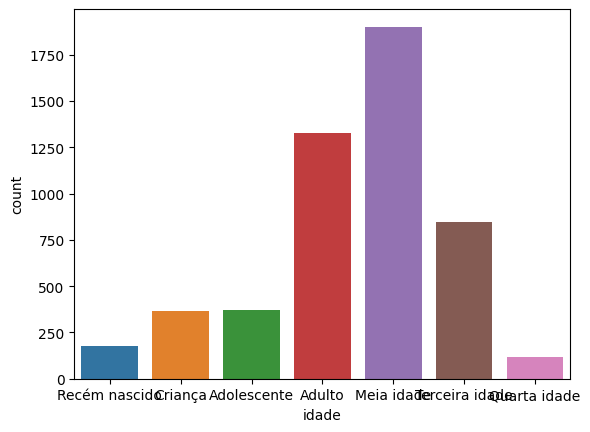

In [837]:
#análise gráfica 'idade'
sns.countplot(x='idade', data=dataset_avc_categorizado)

Visualizando graficamente a classe idade, já categorizada, percebe-se, facilmente, que a grande maioria dos casos de AVC acontecem com pessoas entre as idades Adulta e Terceira idade.

####2.2.1.2 - Categorizando os dados da coluna '*glicose*'

In [838]:
#Definindo os intervalos das classes de 'glicose'
classes_glicose = [0, 70, 100, 126, 10000]

Os intervalos das classes foram definidos da seguinte forma:

Diabetes - glicose acima de 126; 

Pré-diabetes - glicose entre 100 e 126;

Normal - glicose entre 70 e 100;

Hipoglicemia - glicose entre 0 e 70;





In [839]:
#Definindo os labes das classes de glicose
labels_glicose = ['Hipoglicemia', 'Normal', 'Pré-diabetes', 'Diabetes']

Os labels serãos os valores que irão aparecer na coluna de 'idade'

In [840]:
classes_glicose = pd.cut(x=dataset_avc_categorizado.glicose, bins=classes_glicose, labels=labels_glicose)
dataset_avc_categorizado['glicose'] = classes_glicose
dataset_avc_categorizado.head(10)

,gênero,idade,hipertensão,doença_cardíaca,se_casado,tipo_trabalho,tipo_residência,glicose,imc,condição_fumante,avc
0,Masculino,Terceira idade,Não,Sim,Sim,Iniciativa privada,Urbano,Diabetes,36.6,ex-fumante,Sim
1,Feminino,Meia idade,Não,Não,Sim,Autônomo,Rural,Diabetes,NaN,nunca fumou,Sim
2,Masculino,Terceira idade,Não,Sim,Sim,Iniciativa privada,Rural,Pré-diabetes,32.5,nunca fumou,Sim
3,Feminino,Meia idade,Não,Não,Sim,Iniciativa privada,Urbano,Diabetes,34.4,fumante,Sim
4,Feminino,Terceira idade,Sim,Não,Sim,Autônomo,Rural,Diabetes,24.0,nunca fumou,Sim
5,Masculino,Quarta idade,Não,Não,Sim,Iniciativa privada,Urbano,Diabetes,29.0,ex-fumante,Sim
6,Masculino,Terceira idade,Sim,Sim,Sim,Iniciativa privada,Rural,Normal,27.4,nunca fumou,Sim
7,Feminino,Terceira idade,Não,Não,Não,Iniciativa privada,Urbano,Normal,22.8,nunca fumou,Sim
8,Feminino,Meia idade,Não,Não,Sim,Iniciativa privada,Rural,Normal,NaN,NaN,Sim
9,Feminino,Terceira idade,Não,Não,Sim,Iniciativa privada,Urbano,Hipoglicemia,24.2,NaN,Sim


Ao final dessa operação, temos os valores da coluna glicose devidamente categorizados.

<Axes: xlabel='glicose', ylabel='count'>

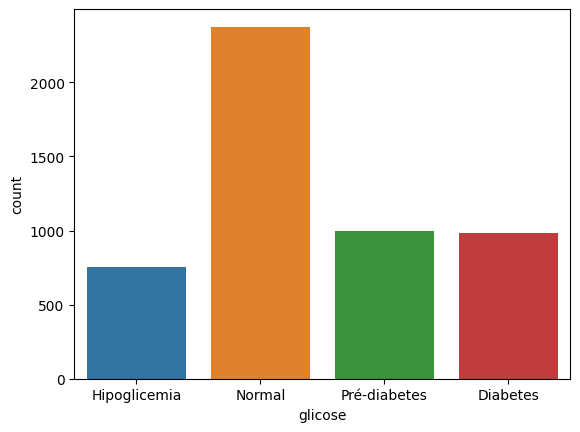

In [841]:
#análise gráfica 'glicose'
sns.countplot(x='glicose', data=dataset_avc_categorizado)

Curiosamente, a visualização gráfica da classe glicose já categorizada permite verificar que a categoria com maior incidência de casos de AVC é a de pessoas com nível de glicose normal. 

####2.2.1.3 - Categorizando os dados da coluna '*imc*'

In [842]:
#Definindo os intervalos das classes de 'imc'
classes_imc = [0, 18.5, 25, 30, 35, 40, 10000]

Os intervalos das classes foram definidos da seguinte forma:

Obesidade III - imc acima de 40; 

Obesidade II - imc entre 35 e 40;

Obesidade I - imc entre 30 e 35;

Acima do peso - imc entre 25 e 30;

Peso normal - imc entre 18.5 e 25;

Abaixo do peso - imc menos que 18.5;

In [843]:
#Definindo os labes das classes de imc
labels_imc = ['Abaixo do peso', 'Peso normal', 'Acima do peso', 'Obesidade I', 'Obesidade II', 'Obesidade III']

Os labels serãos os valores que irão aparecer na coluna de 'idade'

In [844]:
classes_imc = pd.cut(x=dataset_avc_categorizado.imc, bins=classes_imc, labels=labels_imc)
dataset_avc_categorizado['imc'] = classes_imc
dataset_avc_categorizado.head(10)

,gênero,idade,hipertensão,doença_cardíaca,se_casado,tipo_trabalho,tipo_residência,glicose,imc,condição_fumante,avc
0,Masculino,Terceira idade,Não,Sim,Sim,Iniciativa privada,Urbano,Diabetes,Obesidade II,ex-fumante,Sim
1,Feminino,Meia idade,Não,Não,Sim,Autônomo,Rural,Diabetes,NaN,nunca fumou,Sim
2,Masculino,Terceira idade,Não,Sim,Sim,Iniciativa privada,Rural,Pré-diabetes,Obesidade I,nunca fumou,Sim
3,Feminino,Meia idade,Não,Não,Sim,Iniciativa privada,Urbano,Diabetes,Obesidade I,fumante,Sim
4,Feminino,Terceira idade,Sim,Não,Sim,Autônomo,Rural,Diabetes,Peso normal,nunca fumou,Sim
5,Masculino,Quarta idade,Não,Não,Sim,Iniciativa privada,Urbano,Diabetes,Acima do peso,ex-fumante,Sim
6,Masculino,Terceira idade,Sim,Sim,Sim,Iniciativa privada,Rural,Normal,Acima do peso,nunca fumou,Sim
7,Feminino,Terceira idade,Não,Não,Não,Iniciativa privada,Urbano,Normal,Peso normal,nunca fumou,Sim
8,Feminino,Meia idade,Não,Não,Sim,Iniciativa privada,Rural,Normal,NaN,NaN,Sim
9,Feminino,Terceira idade,Não,Não,Sim,Iniciativa privada,Urbano,Hipoglicemia,Peso normal,NaN,Sim


Ao final dessa operação, temos os valores da coluna imc devidamente categorizados.

<Axes: xlabel='imc', ylabel='count'>

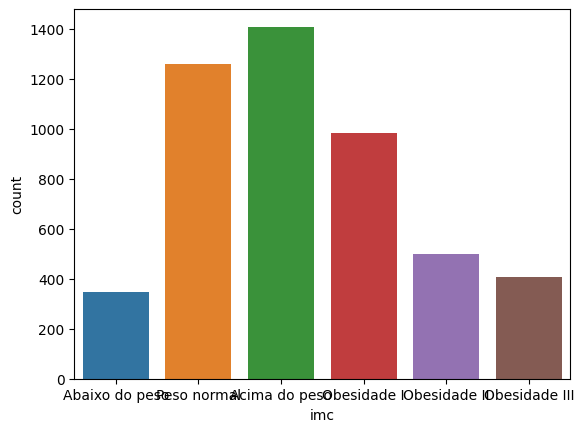

In [845]:
#análise gráfica 'imc'
sns.countplot(x='imc', data=dataset_avc_categorizado)

Acima, tem-se a distribuição da classe 'imc'devidamente categorizada.

###2.2.2 - Separando o Dataset em conjuntos x e y

Considerando que o avc_dataset foi totalmente categorizados, serão realizadas operações categóricas sobre esse dataset.

In [846]:
# separando o array em componentes de input e output
X = avc_dataset.values[:,0:10]
y = avc_dataset.values[:,10]

Inicialmente, separa-se o dataset em dois conjuntos:

*   x - Representa as entradas
*   y - Representa as saídas




###2.2.3 - Codificação ordinal

In [847]:
# ordinal encoding para os atributos X
encoded_X = OrdinalEncoder().fit_transform(X)

# exibindo os dados transformados
print("Atributos transformados:")
print(encoded_X[:5, :]) # 5 primeiras linhas, todas as colunas

Atributos transformados:
[[ 1.  6.  0.  1.  1.  2.  1.  0.  3.  0.]
 [ 0.  3.  0.  0.  1.  0.  0.  0. nan  2.]
 [ 1.  6.  0.  1.  1.  2.  0.  3.  2.  2.]
 [ 0.  3.  0.  0.  1.  2.  1.  0.  2.  1.]
 [ 0.  6.  1.  0.  1.  0.  0.  0.  5.  2.]]


A codificação ordinal foi aplicada, no entanto, talvez essa não seja a transformação mais adequada para este estudo, uma vez que nem todos os atributos do dataset são ordinais.

###2.2.4 - One-hot encoding

In [848]:
# one hot encode para os atributos X
encoded_X = OneHotEncoder(sparse=False).fit_transform(X)

# exibindo os dados transformados
print("Atributos transformados:")
print(encoded_X[:5, :]) # 5 primeiras linhas, todas as colunas

Atributos transformados:
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.
  0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1.
  0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]]


O One-hot encoding parecer ser uma transformação adequada para este estudo, tendo em vista que os atributos do dataset são nominais.